In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cufflinks as cf
import plotly.offline as plyo
from jupyterthemes import jtplot
jtplot.style(theme='chesterish')
%matplotlib inline

In [2]:
y = np.random.standard_normal((1000,2))

Text(0.5, 1.0, 'Scatter Plot')

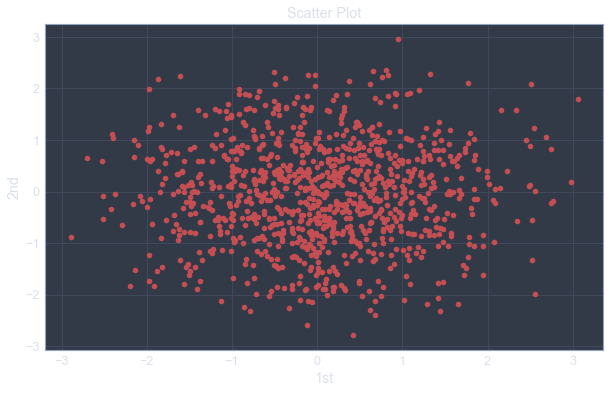

In [3]:
plt.figure(figsize=(10,6))
plt.plot(y[:,0], y[:,1], 'ro')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

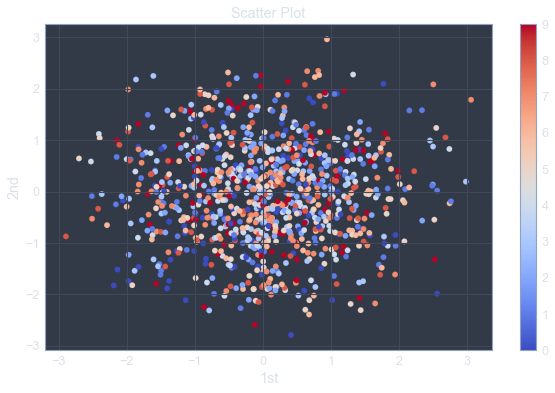

In [4]:
c = np.random.randint(0,10, len(y))
plt.figure(figsize=(10,6))
plt.scatter(y[:,0], y[:,1], c=c, cmap='coolwarm', marker ='o')
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

# Plot Histogram

Text(0.5, 1.0, 'Histogram')

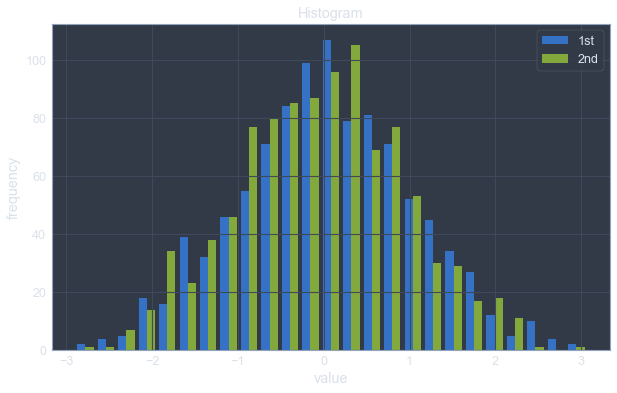

In [5]:
plt.figure(figsize=(10,6))
plt.hist(y,label=['1st','2nd'], bins = 25)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

# Histogram Stacked

Text(0.5, 1.0, 'Histogram')

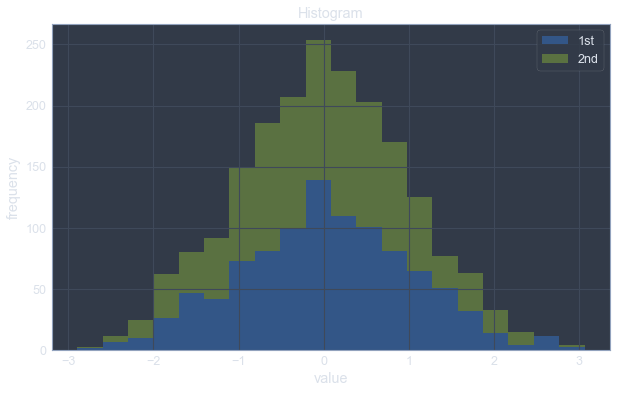

In [6]:
plt.figure(figsize=(10,6))
plt.hist(y,label=['1st','2nd'], color=['b','g'], stacked= True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

# Static 3D Plotting

In [7]:
strike = np.linspace(50,150,24)
ttm = np.linspace(0.5,2.5,24)
strike, ttm =np.meshgrid(strike,ttm) # to create a two-diemnstional array
strike[:2].round(1)

array([[ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ],
       [ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ]])

In [8]:
iv = (strike - 100) ** 2 / (100 * strike) / ttm
iv[:5, :3]

array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

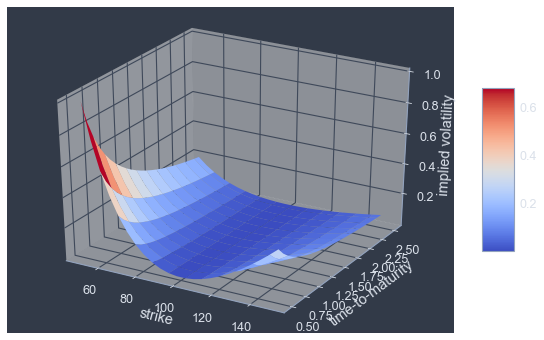

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6)) 
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)

# 2D Interactive Plots 

In [10]:
plyo.init_notebook_mode(connected=True)

In [11]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-1-1',freq='B', periods=len(a))
df = pd.DataFrame(100 + 5 * a,columns=list('abcde'),index=index)
plyo.iplot(df.iplot(asFigure=True), image='png', filename='ply_01')
plt.show()

In [12]:
plyo.iplot(df.iplot(asFigure=True), image='png', filename='ply_01')
plt.show()

In [13]:
plyo.iplot(df.iplot(kind='hist', subplots=True,bins=15,asFigure=True), filename='ply_03')

In [29]:
raw = pd.read_csv('eurusd_hour.csv', index_col =0, parse_dates=True)
raw.info()
quotes = raw[['AO', 'AH','AL','AC']]
quotes.rename(columns={"AO": "open", "AH": "high", "AL":"low","AC":"close"}, inplace=True)
quotes = quotes.iloc[-6000:]
quotes.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93084 entries, 2005-05-02 to 2020-04-29
Data columns (total 11 columns):
Time    93084 non-null object
BO      93084 non-null float64
BH      93084 non-null float64
BL      93084 non-null float64
BC      93084 non-null float64
BCh     93084 non-null float64
AO      93084 non-null float64
AH      93084 non-null float64
AL      93084 non-null float64
AC      93084 non-null float64
ACh     93084 non-null float64
dtypes: float64(10), object(1)
memory usage: 8.5+ MB


open     high      low    close
Date                                          
2020-04-29  1.08660  1.08865  1.08640  1.08726
2020-04-29  1.08725  1.08837  1.08675  1.08760
2020-04-29  1.08758  1.08810  1.08706  1.08808
2020-04-29  1.08808  1.08814  1.08763  1.08766
2020-04-29  1.08756  1.08779  1.08749  1.08760

In [30]:
qf = cf.QuantFig(quotes,title='EUR/USD Exchange Rate',legend='top', name='EUR/USD')


In [31]:
plyo.iplot(qf.iplot(asFigure=True), filename='qf_01')

In [32]:
qf.add_bollinger_bands(periods=15, boll_std=2)
plyo.iplot(qf.iplot(asFigure=True),filename='qf_02')

In [33]:
qf.add_rsi(periods=14,showbands=False)
plyo.iplot(qf.iplot(asFigure=True),
# image='png',
filename='qf_03'
)